In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr('zarr-stores/data.zarr/')
ds

<xarray.Dataset> Size: 23GB
Dimensions:       (time: 4384, grid_yt: 192, grid_xt: 384, z_l: 3, pfull: 3)
Coordinates:
    cftime        (time) object 35kB dask.array<chunksize=(124,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 35kB dask.array<chunksize=(124,), meta=np.ndarray>
  * grid_xt       (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt       (grid_yt) float64 2kB 89.28 88.36 87.42 ... -88.36 -89.28
  * pfull         (pfull) float32 12B 97.82 505.7 998.8
  * time          (time) datetime64[ns] 35kB 1994-01-01 ... 1995-11-18T06:00:00
  * z_l           (z_l) float64 24B 0.5154 47.36 200.3
Data variables: (12/13)
    SSH           (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    dswrf_avetoa  (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    icec          (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    icetk         (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    land          (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    landsea_mask  (z_l, grid_yt, grid_xt) int32 885kB dask.array<chunksize=(3, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, grid_yt, grid_xt) float32 4GB dask.array<chunksize=(1, 3, 192, 384), meta=np.ndarray>
    soilm         (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, grid_yt, grid_xt) float32 4GB dask.array<chunksize=(1, 3, 192, 384), meta=np.ndarray>
    tmp           (time, pfull, grid_yt, grid_xt) float32 4GB dask.array<chunksize=(1, 3, 192, 384), meta=np.ndarray>
    ugrd10m       (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    vgrd10m       (time, grid_yt, grid_xt) float32 1GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

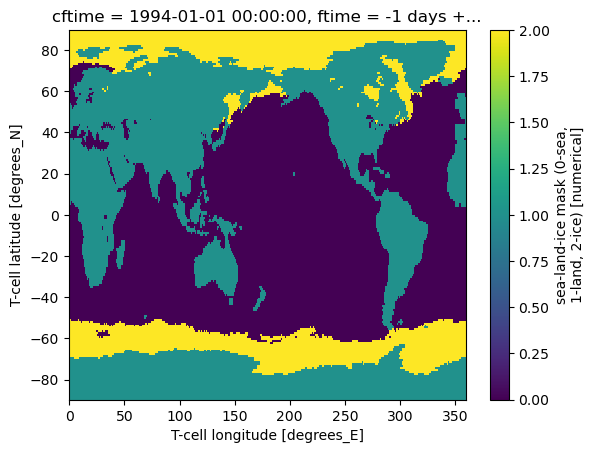

In [3]:
ds.land.isel(time=0).plot()
plt.show()

In [5]:
mask = ds.land.isel(time=0)
landmask = xr.where(mask==1, 1, 0)

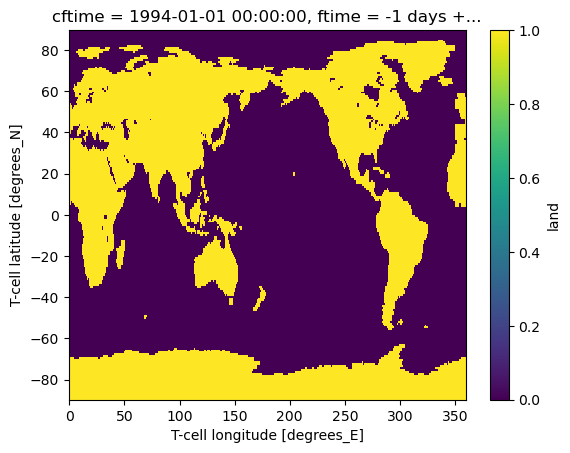

In [6]:
landmask.plot()

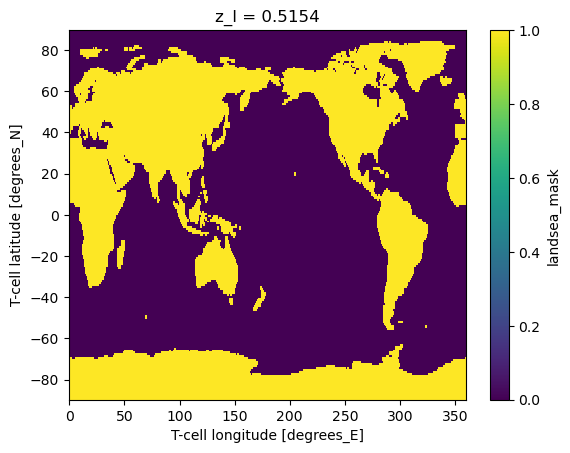

In [8]:
landmask_static = 1 - ds.landsea_mask.isel(z_l=0)
landmask_static.plot()
plt.show()

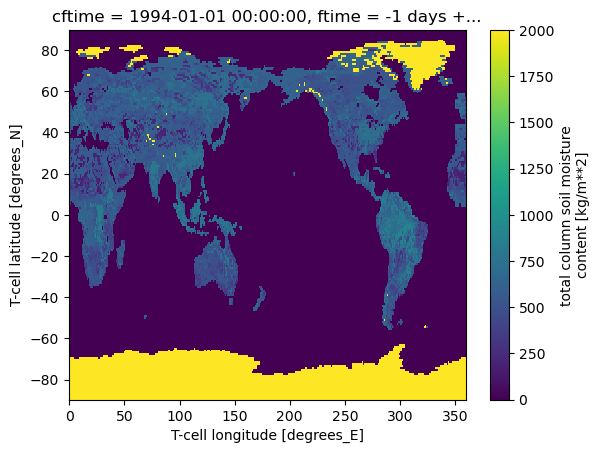

In [7]:
ds.soilm.isel(time=0).plot()
plt.show()

In [13]:
ds_norm = xr.open_zarr('zarr-stores/normalization/coupled/diffs_stddev_by_level.zarr/')
ds_norm

<xarray.Dataset> Size: 1kB
Dimensions:            (z_l: 3, level: 127)
Coordinates:
  * level              (level) float32 508B 0.01278 0.02033 ... 996.2 998.8
  * z_l                (z_l) float64 24B 0.5154 47.36 200.3
Data variables: (12/17)
    SSH                float64 8B ...
    day_progress_cos   float64 8B ...
    day_progress_sin   float64 8B ...
    dswrf_avetoa       float64 8B ...
    icec               float64 8B ...
    icetk              float64 8B ...
    ...                 ...
    temp               (z_l) float32 12B dask.array<chunksize=(3,), meta=np.ndarray>
    tmp                (level) float32 508B dask.array<chunksize=(127,), meta=np.ndarray>
    ugrd10m            float64 8B ...
    vgrd10m            float64 8B ...
    year_progress_cos  float64 8B ...
    year_progress_sin  float64 8B ...
Attributes:
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store provides statistics derived from a subs...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...